# 04ISFOV - COMPUTER VISION

## Image Segmentation

_Lo scopo di questa esercitazione è quello di sperimentare alcune tecniche di Image Segmentation viste a lezione; in particolare, ci concentreremo sull’edge detection (individuazione dei contorni in un’immagine) e su alcuni operatori morfologici. Nella prima ora e mezza dovreste riuscire a completare i primi due esercizi._


### Esercizio 1: Edge Detection

_Utilizzando le funzioni messe a disposizione da OpenCV, visualizzate il flusso video della webcam del vostro computer. Applicate al video due algoritmi di edge detection: prima Canny e poi Sobel. Per Sobel, utilizzare una CV_16S _come profondità dell’immagine di output (per evitare overflow), 3 come dimensione della maschera e applicare l’algoritmo separatamente per la derivata lungo x e lungo y. Verificate che il risultato finale sia quello atteso per entrambi gli algoritmi. Quali differenze macroscopiche si possono notare?_


## Il codice: Pacchetti da importare

In [1]:
%matplotlib inline
%pylab inline 
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import IPython.display
import PIL.Image
from io import BytesIO
plt.rcParams['figure.figsize'] = (10,6)

Populating the interactive namespace from numpy and matplotlib


## Catturiamo il flusso video e applichiamo l'algoritmo Canny

Canny: https://docs.opencv.org/3.4.3/da/d22/tutorial_py_canny.html

Qua sotto le funzioni che abbiamo visto nella terza esercitazione, ci serviranno per gestire il flusso video

In [2]:
#Use 'jpeg' instead of 'png' (~5 times faster)
def array_to_image(a, fmt='jpeg'):
    #Create binary stream object
    f = BytesIO()   
    #Convert array to binary stream object
    PIL.Image.fromarray(a).save(f, fmt)    
    return IPython.display.Image(data=f.getvalue())


def get_frame(cam):
    # Capture frame-by-frame
    ret, frame = cam.read()    
    #flip image for natural viewing
    frame = cv.flip(frame, 1)    
    return frame

In [3]:
cam = cv.VideoCapture(0)
d = IPython.display.display("", display_id=1)
d2 = IPython.display.display("", display_id=2)

while True:
    try:
        t1 = time.time()
        frame = get_frame(cam)
        frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        edges = cv.Canny(frame, 100, 200)  
        im = array_to_image(edges) 
        d.update(im)        
        t2 = time.time()        
        s = f"""{int(1/(t2-t1))} FPS"""
        d2.update( IPython.display.HTML(s) )
    except KeyboardInterrupt:
        print()
        cam.release()
        IPython.display.clear_output()
        print ("Stream stopped")
        break

Stream stopped


_Qua sotto c'è il codice per l'algoritmo Sobel per l'edge detection. Per provare prima un algoritmo e poi l'altro ricordate prima di interrompere il kernel con il quadrato in alto o schiacciando due volte la i dalla tastiera se è già in esecuzione un flusso della webcam_

### Paramentri per l'algoritmo di Sobel

Sobel: https://docs.opencv.org/3.4.3/d2/d2c/tutorial_sobel_derivatives.html 

In [4]:
scale = 1
delta = 0
ddepth = cv.CV_16S

### Catturiamo il flusso video e applichiamo l'algoritmo Sobel

In [5]:
cam = cv.VideoCapture(0)
d = IPython.display.display("", display_id=1)
d2 = IPython.display.display("", display_id=2)

while True:
    try:
        t1 = time.time()
        frame = get_frame(cam)
        frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        src = cv.GaussianBlur(frame, (3, 3), 0)
        gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
        grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
        grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
        abs_grad_x = cv.convertScaleAbs(grad_x)
        abs_grad_y = cv.convertScaleAbs(grad_y)
        grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)  
        im = array_to_image(grad) 
        d.update(im)        
        t2 = time.time()        
        s = f"""{int(1/(t2-t1))} FPS"""
        d2.update( IPython.display.HTML(s) )
    except KeyboardInterrupt:
        print()
        cam.release()
        IPython.display.clear_output()
        print ("Stream stopped")
        break

Stream stopped


### ESERCIZIO 2: DILATAZIONE ED EROSIONE 

_Utilizzando le funzioni messe a disposizione da OpenCV, applicate gli operatori di **erosione e dilatazione** all’immagine “snowy-street.jpg” disponibile sul portale della didattica. Utilizzando l’operatore di dilatazione, cercate di aumentare la quantità e la grandezza dei fiocchi di neve. Ripartendo dall’immagine originale e utilizzando l’operatore di erosione, cercate ora di rimuovere più fiocchi di neve possibile. E’ possibile eliminare completamente la neve che cade, senza compromettere troppo il resto dell’immagine?_

Operatori morfologici: https://docs.opencv.org/3.4.3/d9/d61/tutorial_py_morphological_ops.html 

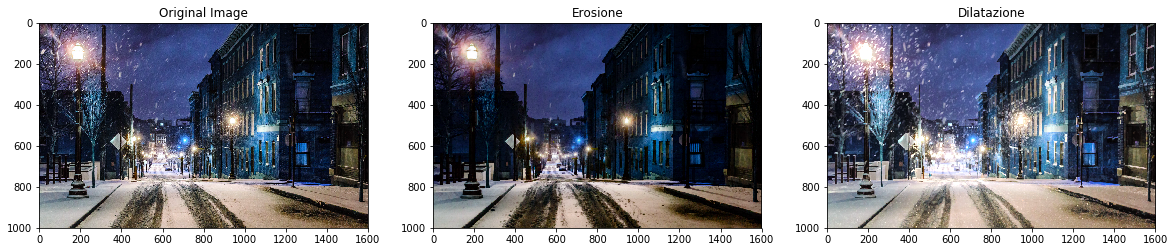

In [6]:
plt.rcParams['figure.figsize'] = (20,10)
snow_img = cv.imread("images/snowy-street.jpg")
kernel = np.ones((5, 5), np.uint8)
erosion = cv.erode(snow_img, kernel, iterations=1)

opening = cv.dilate(snow_img, kernel, iterations=1)

plt.subplot(131)
plt.imshow(snow_img)
plt.title("Original Image")

plt.subplot(132)
plt.imshow(erosion)
plt.title("Erosione")

plt.subplot(133)
plt.imshow(opening)
plt.title("Dilatazione")
plt.show()

### ESERCIZIO 3: RILEVAMENTO SEGNALETICA ORIZZONTALE 

_Quanto visto finora, unito alla **trasformata di Hough**, può essere utilizzato per rilevare la segnaletica orizzontale delle strade. Realizzare un’applicazione con OpenCV per il rilevamento della segnaletica orizzontale._<br/>

_In particolare, dopo le opportune valutazioni sulla scala di colore da utilizzare e la conseguente sua scelta, il programma dovrà sogliare l’immagine/frame per mantenere solo gli oggetti bianchi e gialli, individuare un’appropriata regione di interesse per la strada, applicare Canny ed eventualmente gli operatori morfologici per ottenere i contorni delle linee, utilizzare la trasformata di Hough per rilevare effettivamente le linee, ed infine evidenziare con un colore a scelta la segnaletica orizzontale rilevata._<br/>

_Visualizzare tutti i passaggi intermedi realizzati e non preoccuparsi di seguire con precisione le linee curve. Qual è la percentuale di successo del rilevamento? L’applicazione di una sfocatura Gaussiana con un kernel la cui dimensione è nell’ordine di 9, 11, 15, … per rimuovere il rumore può migliorare il risultato?_ <br/>

Disclaimer: _immagini e video sono tratti dal progetto di Udacity disponibile a https://github.com/udacity/CarND-LaneLines-P1, distribuiti con licenza MIT._

Hough Line Transform https://docs.opencv.org/3.4.3/d6/d10/tutorial_py_houghlines.html 

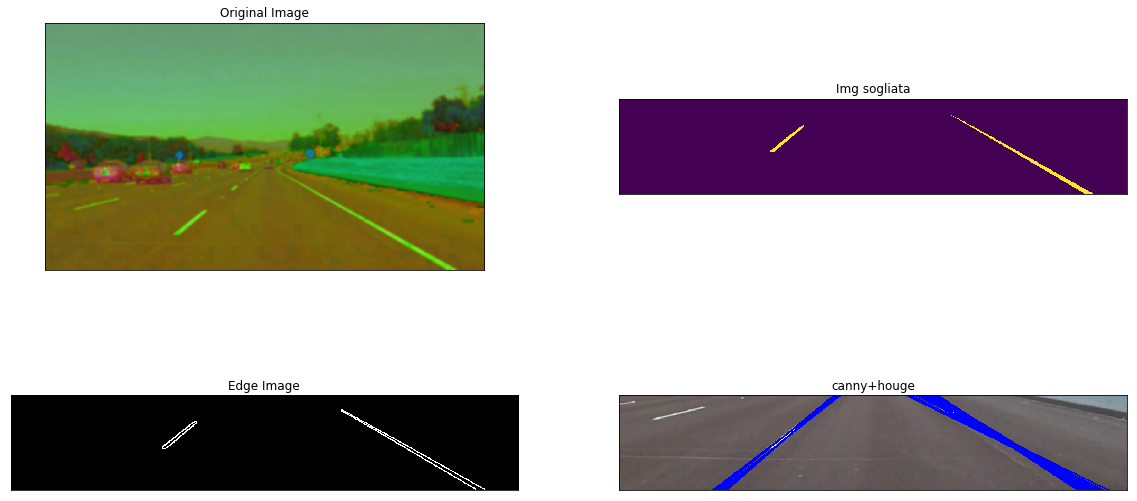

In [7]:
img_prova = cv.imread("images/SolidWhiteCurve.jpg");
imgRGB = cv.cvtColor(img_prova, cv.COLOR_BGR2RGB);
imgHLS = cv.cvtColor(img_prova, cv.COLOR_BGR2HLS);
kernel1 = np.ones((2, 2), np.uint8)
kernel2 = np.ones((1, 1), np.uint8)
imgHLS = cv.GaussianBlur(imgHLS, (11, 11), 0)
# selezioniamo zone bianche
mask_white = cv.inRange(imgHLS, np.array([0, 200, 0]), np.array([180, 255, 255]))
# seleziona zone gialle
mask_yellow = cv.inRange(imgHLS, np.array([16, 30, 100]), np.array([30, 240, 255]))
total_mask = mask_white + mask_yellow

# usiamo canny e le maschere e dopodiché uniamo i risultati per individuare la segnaletica
ROI=total_mask[360:540, 0:960]
edges = cv.Canny(ROI, 100, 200)

#dilatazione
dilation = cv.dilate(edges,kernel1,iterations = 1)
#erosione
IMGerosion = cv.erode(dilation,kernel2,iterations = 1)

ROI2 = img_prova[360:540, 0:960]
lines = cv.HoughLines(IMGerosion, 1, np.pi/180, 70)
count = 0
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(ROI2,(x1,y1),(x2,y2),(0,0,255),2)

plt.subplot(221), plt.imshow(imgHLS)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(ROI)
plt.title("Img sogliata"), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(IMGerosion, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(ROI2)
plt.title('canny+houge'), plt.xticks([]), plt.yticks([])

plt.show();

## Testiamo con il video
Quadrato in alto o doppio "i" per stoppare il kernel

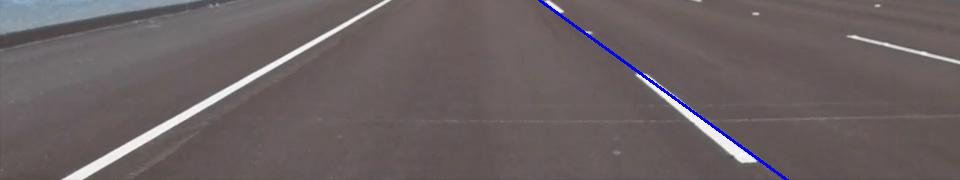

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


In [6]:
cam = cv.VideoCapture('images/solidWhiteRight.mp4')
d = IPython.display.display("", display_id=1)
d2 = IPython.display.display("", display_id=2)

while True:
    try:
        t1 = time.time()
        frame = get_frame(cam)
        imgRGB = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        imgHLS = cv.cvtColor(frame, cv.COLOR_BGR2HLS)
        kernel1 = np.ones((2, 2), np.uint8)
        kernel2 = np.ones((1, 1), np.uint8)
        imgHLS = cv.GaussianBlur(imgHLS, (11, 11), 0)
        # selezioniamo zone bianche
        mask_white = cv.inRange(imgHLS, np.array([0, 200, 0]), np.array([180, 255, 255]))
        # seleziona zone gialle
        mask_yellow = cv.inRange(imgHLS, np.array([16, 30, 100]), np.array([30, 240, 255]))
        total_mask = mask_white + mask_yellow
        # usiamo canny e le maschere e dopodiché uniamo i risultati per individuare la segnaletica
        ROI=total_mask[360:540, 0:960]
        edges = cv.Canny(ROI, 100, 200)
        #dilatazione
        dilation = cv.dilate(edges,kernel1,iterations = 1)
        #erosione
        IMGerosion = cv.erode(dilation,kernel2,iterations = 1)
        ROI2 = frame[360:540, 0:960]
        lines = cv.HoughLines(IMGerosion, 1, np.pi/180, 70)
        count = 0
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
        cv.line(ROI2,(x1,y1),(x2,y2),(0,0,255),2)
        im = array_to_image(ROI2) 
        d.update(im)        
        t2 = time.time()        
        s = f"""{int(1/(t2-t1))} FPS"""
        d2.update( IPython.display.HTML(s) )
    except KeyboardInterrupt:
        print()
        cam.release()
        IPython.display.clear_output()
        print ("Stream stopped")
        break

### LA TRASFORMATA DI HOUGH… IN BREVE 

La trasformata di Hough è una tecnica di estrazione di feature utilizzata per analizzare immagini nella Computer Vision. L’obiettivo della tecnica è di trovare delle istanze imperfette di oggetti all’interno di una certa classe di forme, utilizzando una procedura di votazione. In questa procedura, i candidati oggetti sono ottenuti come un massimo locale in uno spazio detto “accumulatore”, esplicitamente costruito dall’algoritmo della trasformata di Hough. La trasformata classica di Hough riguarda l’identificazione di linee nelle immagini, ma esistono anche sue estensioni per l’identificazione di altre forme, tipicamente cerchi ed ellissi. OpenCV implementa sia la trasformata di Hough per le linee sia quella per i cerchi. 

Per un’introduzione più approfondita: https://en.wikipedia.org/wiki/Hough_transform